# Natural Language Processing and Spam Filtering 
*** 
<a href='https://github.com/pick1'> <img src='nlp.jpg' /></a>

**This project is an NLP project that uses NLTK to filter spam messages from the UCI sms spam collection.**

**Importing Libraries**

In [1]:
import nltk
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style("whitegrid")

**Importing 'stopwords' dataset via NLTK download shell and importing UCI Spam dataset (commented out).**

In [18]:
#nltk.download_shell()

In [2]:
messages = [line.rstrip() for line in open('SMSSpamCollection_','rb')]

**Loading the Data**

In [3]:
print(len(messages))

5574


In [4]:
messages[0]

b'ham\tGo until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [5]:
for mess_num, messages in enumerate(messages[:5]):
    print(mess_num,messages)
    print('\n')

0 b'ham\tGo until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'


1 b'ham\tOk lar... Joking wif u oni...'


2 b"spam\tFree entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"


3 b'ham\tU dun say so early hor... U c already then say...'


4 b"ham\tNah I don't think he goes to usf, he lives around here though"




In [6]:
messages = pd.read_csv('SMSSpamCollection_', sep='\t',names = ['label', 'message'])

In [7]:
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


## Exploring the Data

In [8]:
messages.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


**Interestingly we have less unique messages than we actual messages. This means there are duplicate messages.**

In [9]:
messages.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

## Engineering New Features
**Below we added a 'length' column to as a new feature that describes the length of the strings (messages) from the 'messages' column.**

In [10]:
messages['length'] = messages['message'].apply(len)

In [11]:
messages.head(2)

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29


## Visualizing the Data
***
**Looking at the length of the messages.**

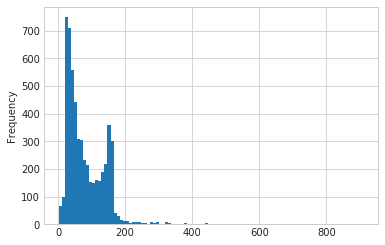

In [14]:
messages['length'].plot.hist(bins = 100);

**Above, there appears to a bimodal behavior. Two peaks, left and right. Also, there appear to be some REALLY long text messages, out to the 1000s?**

In [15]:
messages['length'].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [16]:
messages[messages['length']==910]

,label,message,length
1085,ham,For me the love should start with attraction.i...,910


In [17]:
messages[messages['length']==910]['message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

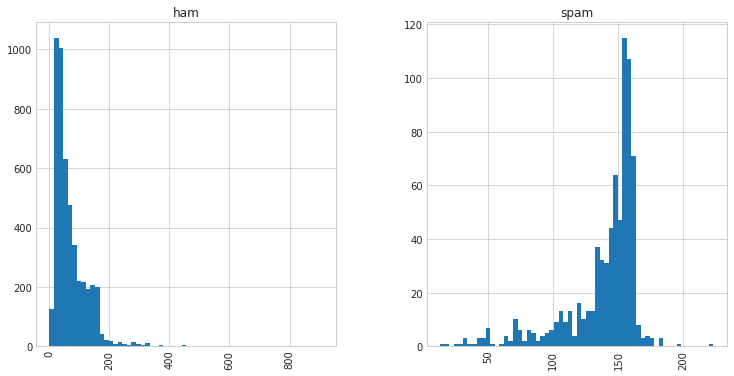

In [21]:
messages.hist(column = 'length', by = 'label', bins = 60, figsize=(12,6));

## String manipulation with NLTK

In [22]:
import string

In [23]:
mess = 'Sample message! Notice: it has punctuation.'

In [24]:
nopunc = [c for c in mess if c not in string.punctuation]

In [26]:
print(nopunc)

['S', 'a', 'm', 'p', 'l', 'e', ' ', 'm', 'e', 's', 's', 'a', 'g', 'e', ' ', 'N', 'o', 't', 'i', 'c', 'e', ' ', 'i', 't', ' ', 'h', 'a', 's', ' ', 'p', 'u', 'n', 'c', 't', 'u', 'a', 't', 'i', 'o', 'n']


In [27]:
from nltk.corpus import stopwords

In [29]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [30]:
nopunc = ''.join(nopunc)
print(nopunc)

Sample message Notice it has punctuation


In [31]:
nopunc.split()

['Sample', 'message', 'Notice', 'it', 'has', 'punctuation']

In [32]:
clean_mess = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [33]:
clean_mess

['Sample', 'message', 'Notice', 'punctuation']

## Creating a function to clean the entire 'messages' column the dataframe
**Function will: remove punctuation, remove stopwords, return list of clean text words.**

In [34]:
def text_process(mess):
    nopunc = [char for char in mess if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [35]:
messages.head(2)

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29


### Tokenizing the words in 'messages'

In [36]:
messages['message'].head(5).apply(text_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object

### Bag-of-words (BOW) modelling

In [37]:
from sklearn.feature_extraction.text import CountVectorizer

In [38]:
bow_transformer = CountVectorizer(analyzer = text_process).fit(messages['message'])

In [39]:
print(len(bow_transformer.vocabulary_))

11425


**Running a BOW sample. The sample uses the 4th message from the messages dataset **

In [41]:
mess4 = messages['message'][3]
print(mess4)

U dun say so early hor... U c already then say...


In [42]:
bow4 = bow_transformer.transform([mess4])
print(bow4)
print('\n', bow4.shape)


  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2

 (1, 11425)


** The sample shows that there are 7 unique words in the sample and 2 appear twice. Shape, shows that our sample is 1 of our 11425 items.**
***
**Using '.get_feature_names' to explore which values from the above output mean what.**

In [43]:
bow_transformer.get_feature_names()[4068]

'U'

## Passing the entire 'message' column from 'messages' dataframe through BOW transformer

In [44]:
messages_bow = bow_transformer.transform(messages['message'])

In [45]:
print('Shape of Sparse Matrix: ', messages_bow.shape)

Shape of Sparse Matrix:  (5572, 11425)


**Check for non-zero occurences**

In [47]:
messages_bow.nnz

50548

**Checking for Sparsity - Compares the total number of non-zero messages to the total number of messages. **

In [50]:
sparsity = (100.0 * messages_bow.nnz / (messages_bow.shape[0] * messages_bow.shape[1]))
#print('sparsity: {}'.format(round(sparsity)))
print('sparsity: {}'.format(sparsity))

sparsity: 0.07940295412668218


## Term Frequency Inverse Document Frequency (TFIDF)

In [52]:
from sklearn.feature_extraction.text import TfidfTransformer

In [53]:
tfidf_transformer = TfidfTransformer().fit(messages_bow)

**Running TFIDF on sample4 from before.**

In [55]:
tfidf4 = tfidf_transformer.transform(bow4)
print(tfidf4)

  (0, 9554)	0.5385626262927564
  (0, 7186)	0.4389365653379857
  (0, 6222)	0.3187216892949149
  (0, 6204)	0.29953799723697416
  (0, 5261)	0.29729957405868723
  (0, 4629)	0.26619801906087187
  (0, 4068)	0.40832589933384067


**The above can be interpreted as a weight value for each of the words versus the document.**
***
**Checking the TFIDF of a word - e.g. University.**

In [56]:
tfidf_transformer.idf_[bow_transformer.vocabulary_['university']]

8.527076498901426

In [57]:
messages_tfidf = tfidf_transformer.transform(messages_bow)

## Using Naive-Bayes Classifier to categorize Spam vs. Ham

In [58]:
from sklearn.naive_bayes import MultinomialNB

In [59]:
spam_detect_model = MultinomialNB().fit(messages_tfidf, messages['label'])

In [60]:
spam_detect_model.predict(tfidf4)[0]

'ham'

In [61]:
messages['label'][3]

'ham'

In [63]:
all_pred = spam_detect_model.predict(messages_tfidf)
all_pred

array(['ham', 'ham', 'spam', ..., 'ham', 'ham', 'ham'], dtype='<U4')

In [64]:
from sklearn.model_selection import train_test_split

In [65]:
msg_train, msg_test, label_train, label_test = train_test_split(messages['message'], messages['label'], test_size=0.33)

## SciKitLearn Data Pipeline
***
**Shortcutting the workflow**

In [68]:
from sklearn.pipeline import Pipeline

In [71]:
pipeline = Pipeline([('bow', CountVectorizer(analyzer=text_process)),
                     ('tfidf', TfidfTransformer()),
                     ('classifier', MultinomialNB())])

In [72]:
pipeline.fit(msg_train, label_train)

Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer=<function text_process at 0x7c15b336a8c8>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocessor=No...f=False, use_idf=True)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [73]:
predictions = pipeline.predict(msg_test)

In [77]:
from sklearn.metrics import classification_report
print('Classification Report: ','\n'*2, classification_report(label_test,predictions))

Classification Report:  

              precision    recall  f1-score   support

        ham       0.95      1.00      0.98      1597
       spam       1.00      0.68      0.81       242

avg / total       0.96      0.96      0.95      1839



# Conclusion
***
**Python was able to classify spam emails with a 96% accuracy!**